## Self Driving cars Project Deep learning

### Class meaning
class_id 0: 'car'

class_id 1: 'truck'

class_id 2: 'pedestrian'

class_id 3: 'bicyclist'

class_id 4: 'light'


**First ask me for a selfie. Transform my selfie into a fresh but professional image suitable for a social media profile. The lighting should be natural, flattering, and multidimensional. My head is slightly tilted so it doesn't look stiff and it should look like I'm in a modern, bright office with a blurred background.**

In [3]:
# introduction 
#### libraries to use
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras import Model, layers

In [4]:
IMAGE_SIZE= 256
BATCH_SIZE = 32

In [5]:
# image directory
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    "Train", 
    shuffle=True, 
    image_size=IMAGE_SIZE, 
    batch_size=BATCH_SIZE
)

Found 3352 files belonging to 7 classes.


In [6]:
# image directory
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    "Test", 
    shuffle=True, 
    image_size=IMAGE_SIZE, 
    batch_size=BATCH_SIZE
)

Found 813 files belonging to 7 classes.


In [7]:
class_names = dataset_test.class_names
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [8]:
class_names = dataset_train.class_names
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [9]:
len(dataset_train)

105

In [10]:
for image_batch, label_batch in dataset_train.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[3 3 0 6 5 4 6 2 3 3 0 0 2 0 2 6 0 2 5 1 0 2 4 6 4 4 4 3 4 3 4 6]


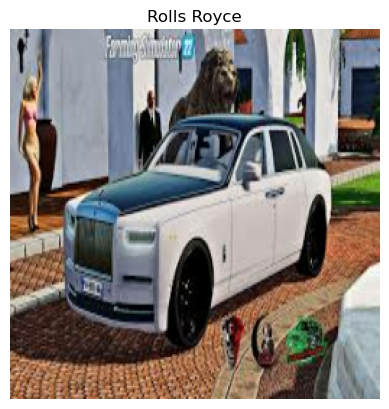

In [11]:
for image_batch, label_batch in dataset_train.take(1):
    plt.imshow(image_batch[6].numpy().astype("uint8"))
    plt.title(class_names[label_batch[6]])
    plt.axis("off")

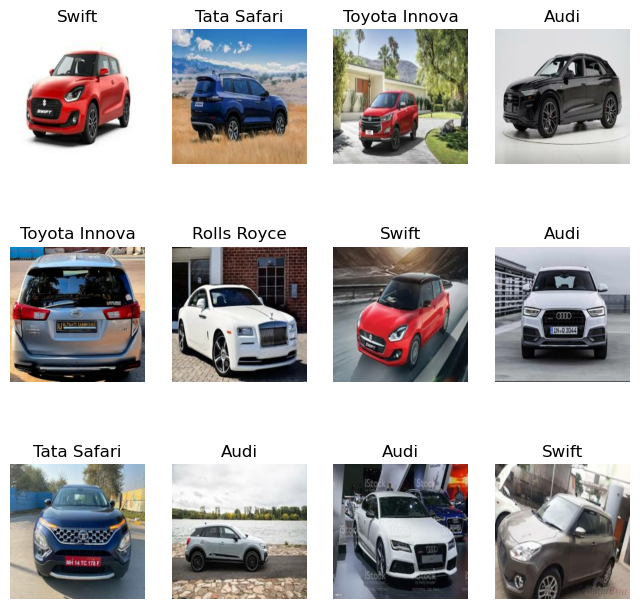

In [12]:
 # displaying 12 images
plt.figure(figsize=(8, 8))
for image_batch, label_batch in dataset_train.take(1):
    for i in range(12):
        axis = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

#### Testing and Validation Part

##### The reason is that without buffer_size, the pipeline has to load your entire dataset into memory before it can start shuffling it. This would likely cause your computer to crash with an out-of-memory error.



####  This means that our datasets are batched, we had more than 130k images and their labels, but for now then, we only have 4k. its a success, and we batched correctly


The len(final_data) being 4138 means that your dataset has been batched into 4,138 groups. It doesn't represent the number of images. The actual number of images in your dataset is much larger (over 132,000 for training alone).



In [13]:
# Training part then!!!!!!
## Lets Cache, why? in order to improve the memory of our model, its when an image passed, allowing it to be remembered is, by Caching

training= dataset_train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
testing= dataset_test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


# prefetch : is usually, we ran the training for the model, before it starts another demand of training, the other patch is already there!

#### Resize the dataset, this is to help, when we have the model not having this critical conditions, its difficult for us to know which appropriate solution is good!

In [14]:
resize_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [15]:
# Augmentation is also the same as this one!! its about rotation, height, more

data_augmentation  = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"), 
    layers.RandomRotation(0.2)
])

# using a Data pipeline
#### on this part we already used the training data, since we have 3 separate files and labels!! 
 - Train: 132k images, we separated them in batches of 32, meaning 1st batch is 4k images.
 - Test & Validation: 32,699 images and will be used to check how well your model is learning during training
 - labels_train_val.csv: 165,105 images. This file is a combination of the training and validation data. But ITS NOT USEFUL HOWEVER USING IT FOR DEPLOYMENT ONLY

# PART 2
#### Using a Model for our work.

In [16]:
CHANNEL = 3
n_classes = 7
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNEL)


In [17]:
for image_batch, label_batch in dataset_train.take(1):
    print("Batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)

# Expected output:
# Batch shape: (32, 224, 224, 3)
# Label batch shape: (32,)

Batch shape: (32, 256, 256, 3)
Label batch shape: (32,)


In [18]:



model =tf.keras.Sequential([
    tf.keras.Input(shape=input_shape),
    resize_rescale, 
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size = (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation ='relu'),
    layers.MaxPooling2D((2, 2)),
     
    layers.Flatten(),
    
    # Dense Layers (corrected)
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

In [19]:
 model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,007 (718.78 KB)

 Trainable params: 184,007 (718.78 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer= 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics= ['accuracy']
)

In [21]:
EPOCHS = 50
history = model.fit(
    dataset_train, 
    epochs= EPOCHS, 
    batch_size=BATCH_SIZE, 
    verbose=1, 
    validation_data= dataset_test
)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.2440 - loss: 1.8655 - val_accuracy: 0.2497 - val_loss: 1.8179
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.3106 - loss: 1.7761 - val_accuracy: 0.3333 - val_loss: 1.7329
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.3353 - loss: 1.7297 - val_accuracy: 0.3530 - val_loss: 1.6978
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.3314 - loss: 1.7256 - val_accuracy: 0.3444 - val_loss: 1.6984
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.3356 - loss: 1.7077 - val_accuracy: 0.3444 - val_loss: 1.7180
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.3487 - loss: 1.6895 - val_accuracy: 0.3333 - val_loss: 1.6925
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.3487 - loss: 1.6908 - val_accuracy: 0.3395 - val_loss: 1.7150
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.3652 - loss: 1.6536 - val_accu

In [22]:
# To be continued ......

In [23]:
scores= model.evaluate(dataset_train)

105/105 ━━━━━━━━━━━━━━━━━━━━ 29s 275ms/step - accuracy: 0.7804 - loss: 0.6367


In [24]:
scores= model.evaluate(dataset_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.7196 - loss: 0.9174


In [25]:
scores
# loss and accuracy

[0.9174155592918396, 0.7195571660995483]

In [26]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 105}

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [28]:
history.history['accuracy']

[0.24403341114521027,
 0.31056085228919983,
 0.33532220125198364,
 0.3314439058303833,
 0.3356205224990845,
 0.34874701499938965,
 0.34874701499938965,
 0.3651551306247711,
 0.3559069335460663,
 0.3806682527065277,
 0.38782817125320435,
 0.4003579914569855,
 0.4107995331287384,
 0.4361575245857239,
 0.45137232542037964,
 0.4597255289554596,
 0.46151551604270935,
 0.5029832720756531,
 0.5226730108261108,
 0.5092481970787048,
 0.5214797258377075,
 0.5566825866699219,
 0.5656324625015259,
 0.571300745010376,
 0.575775682926178,
 0.6085919141769409,
 0.6023269891738892,
 0.6157518029212952,
 0.6106801629066467,
 0.6390214562416077,
 0.633949875831604,
 0.6411097645759583,
 0.6440930962562561,
 0.665274441242218,
 0.6730310320854187,
 0.6709427237510681,
 0.6819809079170227,
 0.6852625012397766,
 0.7016706466674805,
 0.7079355716705322,
 0.7028639912605286,
 0.711515486240387,
 0.7180787324905396,
 0.7240453362464905,
 0.7359785437583923,
 0.7323985695838928,
 0.7323985695838928,
 0.7538782

In [29]:
# plot a matplotlib chart
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

Text(0.5, 1.0, 'Accuracy of training and Validation Loss')

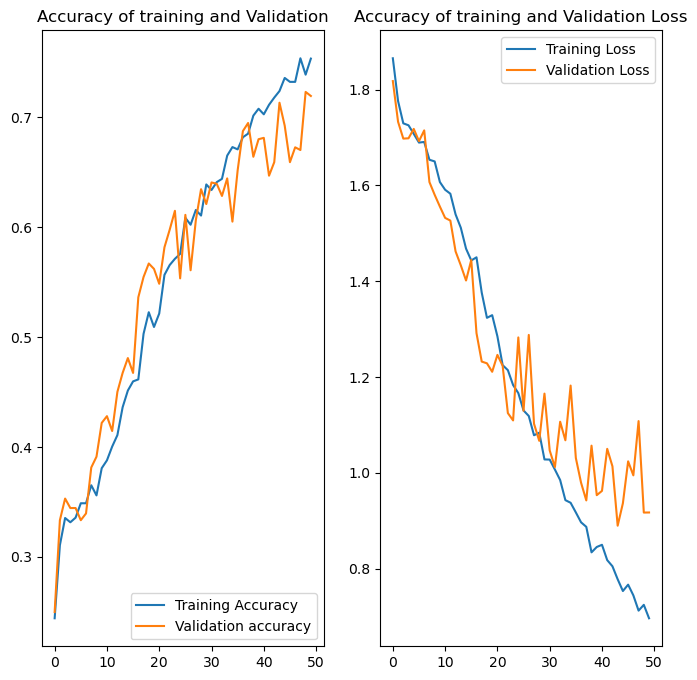

In [30]:
EPOCHS=50
plt.figure(figsize=(8, 8))
plt.subplot(1,2, 1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation accuracy")
plt.legend(loc= 'lower right')
plt.title('Accuracy of training and Validation')

# plotting the loss chart

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label= "Training Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc= 'upper right')
plt.title('Accuracy of training and Validation Loss')

In [31]:
# finding the highest number 
import numpy as np
np.argmax([1.9783317e-01, 1.2841953e-02, 5.2364776e-03, 9.6323472e-03,  7.0848727e-01, 3.9008848e-04, 6.5578721e-02])
# 7.008*-1

4

First image to predict
first image actual label:  Audi
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
predicted label:  Audi


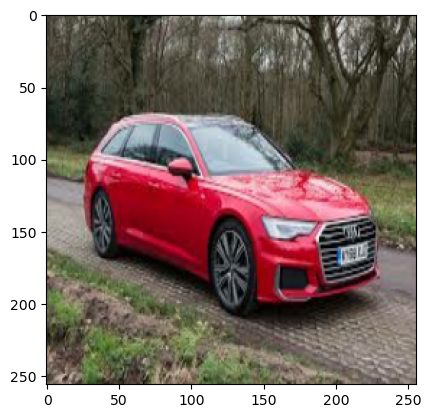

In [32]:
# make prediction 

for images_batch, labels_batch in dataset_test.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("first image actual label: ", class_names[first_label])


    batch_prediction = model.predict(images_batch)
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])

    ## the predictions are quite hard to understand, so we use only, counting the highest number like here we have 1.97*-1
    # but we can use np.argmax!!! Look above

## The reason why the images in the predictions keep on changing is because we told it to "SHUFFLE"

In [33]:
# this is the same as above, but cleaner
def predict(model, image):
    image_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array = tf.expand_dims(image_array, 0)  # create a batch

    predictions= model.predict(image_array)

    predicted_class = model.predict(image_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


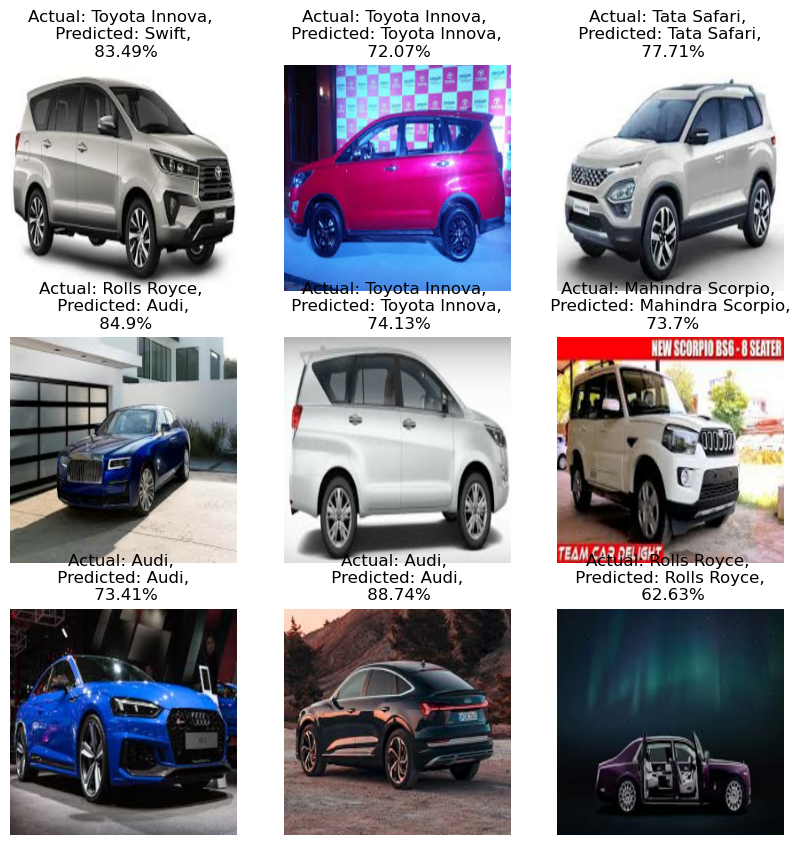

In [34]:
# lets print 9 images
plt.figure(figsize=(10, 10))
for images, labels in dataset_test.take(1):
    for i in range(9):
        ax= plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        predicted_class, confidence = predict(model, images[1].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n {confidence}%") 

**Save the Model**

In [35]:
import os

In [36]:
import h5py

In [38]:
# Assuming you're using TensorFlow's Keras framework
model_version = "1.0"
model.save(f"car_model_v{model_version}.keras")

# Alternative if you used model.export()
model.export(f"car_model_v{model_version}")

INFO:tensorflow:Assets written to: car_model_v1.0\assets


INFO:tensorflow:Assets written to: car_model_v1.0\assets


Saved artifact at 'car_model_v1.0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1489194896464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489175280528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489194897616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489194896656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489176291344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489176291152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489176290576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489176287120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489176290192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489176290960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1489176290384: TensorSpec(shape=(), 

In [39]:
import tensorflow as tf
import h5py

print("TensorFlow version:", tf.__version__)
print("h5py version:", h5py.__version__)

TensorFlow version: 2.18.1
h5py version: 3.14.0


In [46]:
model_version = 22
model.save(f"C:/Users/USER/Desktop/Projects_git/{model_version}.keras")